**Introduction:** While this notebook is intended to be beginner-friendly, it won't be feasible to explain every concept in detail to keep it a reasonable size. However, if you have the required prerequisites and basic understanding of Machine Learning, we hope it will be beneficial to you.

**We would also like to express our gratitude to the Kaggle community as a whole for their efforts in making knowledge accessible to everyone. Thank you.**

# Titanic: "Women and Children First!" - A beginner-friendly guide to applying Data Science and Machine Learning to the Titanic disaster.

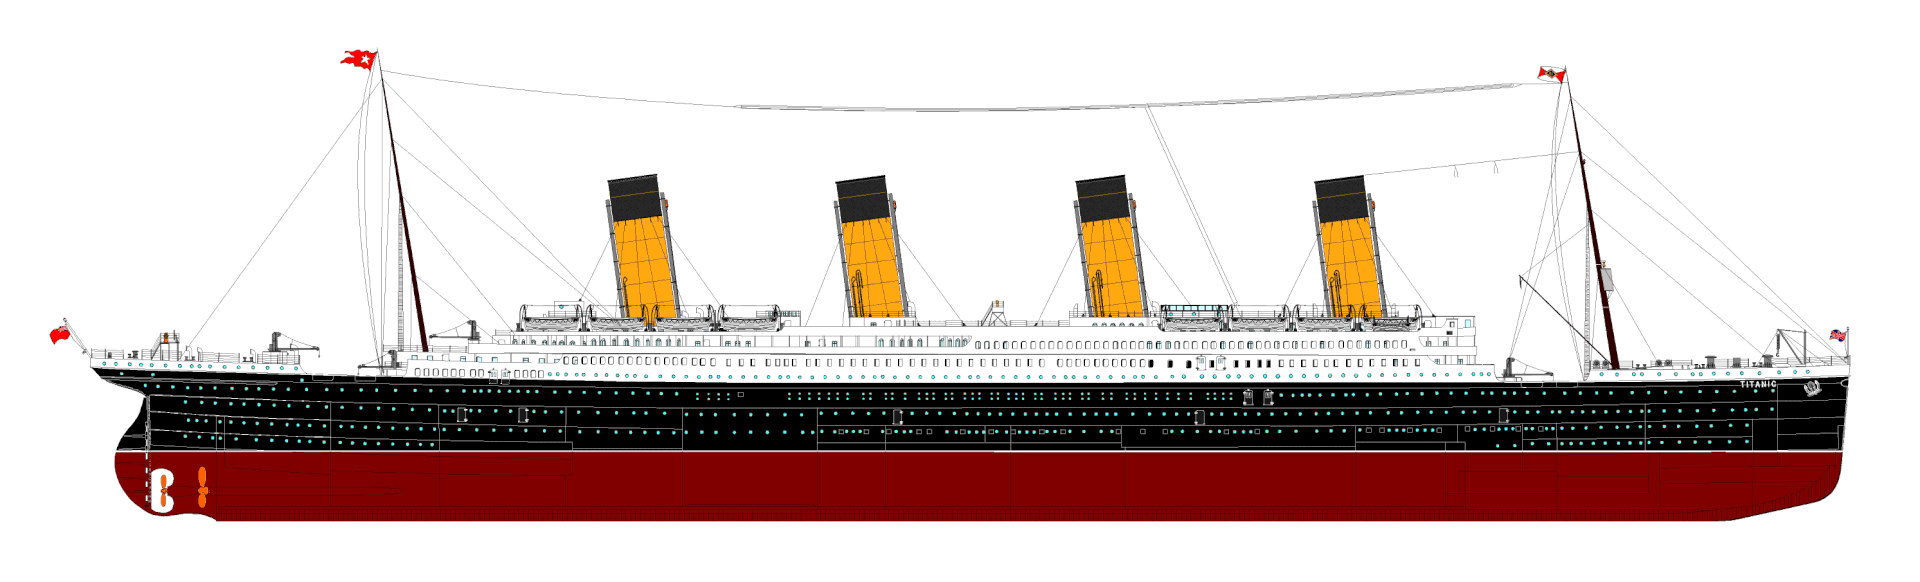

### Table of Contents

* [1. "Women and children first," really? ](#1)
    * [1.1 Brief Overview of the Sequence of Events.](#1.1)
    * [1.2 Some Anecdotes and Notable Facts](#1.2)
    * [1.3 Getting to the Heart of the Matter](#1.3)
* [2. Exploratory Data Analysis (EDA)](#2)
    * [2.1 Data Loading and Verification](#2.1)
        * [2.1.1 Data Dictionary](#2.1.1)
        * [2.1.2 The pandas.describe Function](#2.1.2)
        * [2.1.3 The pandas.info Function](#2.1.3)
    * [2.2 Data Visualization: A picture is worth a thousand words!](#2.2)
        * [2.2.1 Visualization of the Age and Fare Distributions Using Histograms](#2.2.1)
        * [2.2.2 Visualization and Analysis of Data Using a "Swarm" Plot](#2.2.2)
        * [2.2.3 Visualization and Analysis of Boarding Data](#2.2.3)
    * [2.3 A Dash of Feature Engineering](#2.3)
        * [2.3.1 Family Size](#2.3.1)
        * [2.3.2 Title and Last Name](#2.3.2)
        * [2.3.3 Identifying and grouping women and children from the same family](#2.3.3)
    * [2.4 Back to exploration...](#2.4)
* [3. Data modeling](#3)
    * [3.1 Decision tree 'women and children first'](#3.1)    
* [4. Machine Learning](#4)
    * [4.1 Feature engineering and data preprocessing.](#4.1)
        * [4.1.1 creation of the 'isMaster' feature.](#4.1.1)
        * [4.1.2 Data preprocessing](#4.1.2)
    * [4.2 XGBoost and GridSearchCV](#4.2)
        * [4.2.1 Definition of the hyperparameters to test](#4.2.1)
        * [4.2.2 Definition of the xgb_classifier function](#4.2.2)
        * [4.2.3 Feature Selection](#4.2.3)
        * [4.2.4 training](#4.2.4)
        * [4.2.5 Submitting our predictions to Kaggle and scoring](#4.2.5)
* [5. Recap and How to Go Further...](#5)
    * [5.1 How good is your score](#5.1)
    * [5.2 How to go further?](#5.2)
        
        

# 1."Women and children first," really? <a class="anchor"  id="1"></a>

"The women and children first" principle is a concept that involves prioritizing the rescue of women and children before adult men in the face of a threat. During the 19th and early 20th centuries, ships with a tonnage of less than 10,000 tons did not have enough lifeboats to save all passengers. The idea of saving women and children during a shipwreck became particularly prominent in history during the Titanic disaster in 1912, perhaps the most famous maritime catastrophe of all time.

"However, according to the 2012 Swedish study titled 'Gender Social Norms and Survival in Maritime Disaster,' the survival rate of women and children is determined to be low. Analyzing 18 major maritime disasters that occurred between 1852 and 2011 and involved over 15,000 individuals from more than 30 different nationalities, the study reveals that the survival rate of the crew and captain surpasses that of the passengers. Men have a survival rate twice that of women, while children's survival rate reaches only 15%. This research posits the Titanic disaster as an exception, one of the few shipwrecks in the modern era where this principle was adhered to."

> (en) M. Elinder et O. Erixson, « Gender, social norms, and survival in maritime disasters », Proceedings of the National Academy of Sciences,‎ 2 mai 2012 https://www.pnas.org/doi/full/10.1073/pnas.1207156109

The gender gap in survival rates has decreased since World War I, and women are more disadvantaged in British shipwrecks. The study asserts, "Taken together, our results show that human behavior in life or death situations is better described by the expression 'every man for himself' or 'every person for themselves.'"

However, the study specifies that the Titanic disaster is an exception, and we will explore what the data analysis can tell us. Here, we will solely use the dataset provided by Kaggle as part of the friendly competition themed around the Titanic. We will stick to this dataset and refrain from introducing external structured data to play the game fairly.

# 1.1 Brief Overview of the Sequence of Events. <a class="anchor"  id="1.1"></a>

Even though this shipwreck is well-known, particularly through James Cameron's 1997 film, it seems useful to provide a brief overview of the events.

The sinking of the Titanic marked the end of the maiden voyage of the RMS Titanic, a ship intended to connect Southampton to New York. The Titanic was equipped with sixteen watertight compartments designed to protect the ship from significant damage. The media portrayed it as a reliable and even "unsinkable" vessel. However, contrary to this legend, historians emphasize that it was not considered "unsinkable" by its builders.

> Source: Richard Howells, "The Myth of the Titanic," Palgrave Macmillan, 2012.

The sinking unfolded on the night of April 14 to April 15, 1912, in the North Atlantic Ocean off the coast of Newfoundland. The ship struck an iceberg on the starboard side on Sunday, April 14, 1912, at 11:40 PM and sank in less than three hours, at 2:20 AM. Between 1,490 and 1,520 people perished, making this disaster one of the greatest maritime tragedies of all time.

The Titanic is a British transatlantic liner of the White Star Line, built at the initiative of Bruce Ismay and designed by the architect Thomas Andrews of the Harland & Wolff shipyards. Its construction began in 1909 in Belfast and was completed in 1912. At the time of its launch, it was the most luxurious and largest ship ever built. Its construction followed that of a nearly identical ship, the Olympic.

# 1.2 Some Anecdotes and Notable Facts. <a class="anchor"  id="1.2"></a>

* The ship did not have a sufficient number of lifeboats, and the crew had never been trained to handle this type of event.

* The stewards then went to the cabins to invite passengers to put on warm clothes and a life jacket, asking them to go to the lifeboat deck. In order to reassure the passengers, the crew assured them that it was just a drill.

* As a result, due to its reputation as unsinkable and the reassuring statements, disbelief prevailed.

* Only a few passengers made their way to the lifeboat deck to board a lifeboat, and the majority did not worry and stayed inside the ship for a long time.

* The first-class passengers were informed first, followed by the second class. The third-class passengers were prevented from accessing the deck until a later hour.

* At 12:25 AM, the order is given to load women and children first into the lifeboats. At the same moment, the orchestra starts playing at the front of the lifeboat deck, following the command of Captain Smith, who aims to prevent any onset of panic.

* Due to continued disbelief, many passengers were reluctant to board the lifeboats.

* Regarding the first lifeboats, the officers on the port side only allowed women and children to board, while on the starboard side, each lifeboat was loaded with women and children first, followed by men. The pragmatism on the starboard side led to launching fully loaded lifeboats and better survivability for men, while on the port side, idealism and strict adherence to orders resulted in lifeboats with many vacant seats. This fact is very interesting, although it may be challenging to utilize with the data provided by Kaggle.

* From 1:15 onwards, water began to flood the bow of the ship, and passengers, who were previously in disbelief, started to come to terms with the reality of the sinking. The evacuation accelerated from this point. Additionally, third-class passengers started arriving in larger numbers on the lifeboat deck.

# 1.3 Getting to the Heart of the Matter <a class="anchor"  id="1.3"></a>

It's time to get to the heart of the matter, and to start, in the next cell, we will import all the libraries that will be useful to us. For practical reasons, we will centralize all imports here.







In [1]:
# import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Modelization
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
print("hello, world")

hello, world


# 2. Exploratory Data Analysis (EDA) <a class="anchor"  id="2"></a>

In summary, exploratory data analysis will help us understand the data patterns, check for integrity, and summarize relevant information for predictive models.

> Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

> source : https://www.ibm.com/topics/exploratory-data-analysis

# 2.1 Data Loading and Verification <a class="anchor"  id="2.1"></a>

In this section, we will load the data provided by Kaggle and take a first look.

In [3]:
# Load Data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

# combine All Data
all_data = pd.concat([train, test], axis=0).reset_index().drop('index', axis=1)

In [4]:
# Have a look on data
display(train.head(3))
display(test.head(3))
display(all_data.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2.1.1 Data Dictionary <a class="anchor"  id="2.1.1"></a>

Establishing a data dictionary is essential as a reference to interpret the data without ambiguity regarding its meaning. Here is a good definition of what a data dictionary is:

> A Data Dictionary is a collection of names, definitions, and attributes about data elements that are being used or captured in a database, information system, or part of a research project. It describes the meanings and purposes of data elements within the context of a project, and provides guidance on interpretation, accepted meanings and representation. A Data Dictionary also provides metadata about data elements. The metadata included in a Data Dictionary can assist in defining the scope and characteristics of data elements, as well the rules for their usage and application. 

> source: https://library.ucmerced.edu/data-dictionaries#:~:text=A%20Data%20Dictionary%20is%20a,part%20of%20a%20research%20project

* **survival:** survival
    * 0 = No,
    * 1 = Yes
* **pclass:** ticket class
    * 1 = 1st,
    * 2 = 2nd,
    * 3 = 3rd
* **sex:** sex
* **Age:** age in years
* **sibsp:** number of siblings / spouses aboard the Titanic
* **parch:** number of parents / children aboard the Titanic
* **ticket:** ticket number
* **fare:** passenger fare
* **cabin:** cabin number
* **embarked:** Port of Embarkation
    * C = Cherbourg,
    * Q = Queenstown,
    * S = Southampton



# 2.1.2 The pandas.describe Function <a class="anchor"  id="2.1.2"></a>   

Firstly, below is a description of the entire dataset using the 'describe' function provided by pandas.

> The pandas.describe function is used to get a descriptive statistics summary of a given dataframe. This includes mean, count, std deviation, percentiles, and min-max values of all the features.

> source : https://www.machinelearningplus.com/pandas/pandas-describe/

In [5]:
display(all_data.drop(['PassengerId', 'Survived', 'Pclass'] , axis=1).describe())

,Age,SibSp,Parch,Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881138,0.498854,0.385027,33.295479
std,14.413493,1.041658,0.865560,51.758668
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


# 2.1.3 The pandas.info Function <a class="anchor"  id="2.1.3"></a>

> The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

> source : https://www.w3schools.com/python/pandas/ref_df_info.asp 



In [6]:
display(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

# 2.2 Data Visualization: A picture is worth a thousand words! <a class="anchor"  id="2.2"></a>

To start, let's take a quick look at the distribution of age and the "Fare" feature. In the next cell, we will build a function to visualize them so that we don't have to repeat code unnecessarily. We will observe these two features on the entire available dataset.

# 2.2.1 Visualization of the Age and Fare Distributions Using Histograms. <a class="anchor"  id="2.2.1"></a>

> A histogram is a statistical graph that represents the distribution of a continuous dataset through plotted bars, each representing a particular category or class interval. The bar height reflects the frequency or count of data points within each group.

> source : https://www.jaspersoft.com/articles/what-is-a-histogram-chart


In [7]:
def plot_hist(features, data):
    plt.figure(figsize = (10,4))
    plt.hist(data[features], bins = 50)
    plt.xlabel(features)
    plt.ylabel("Frequency")
    plt.title(f"{features} distribution")
    plt.show()

Of course, in observing the age distribution, we are mindful that we have 263 missing values across all data. Here, we won't attempt to fill these gaps using the mean or median, etc., to avoid creating a 'spike' in the graph that doesn't reflect reality. We will, therefore, work with the information we have.



In [8]:
print("Number of missing value for Age in all data : ",all_data['Age'].isnull().sum())

Number of missing value for Age in all data :  263


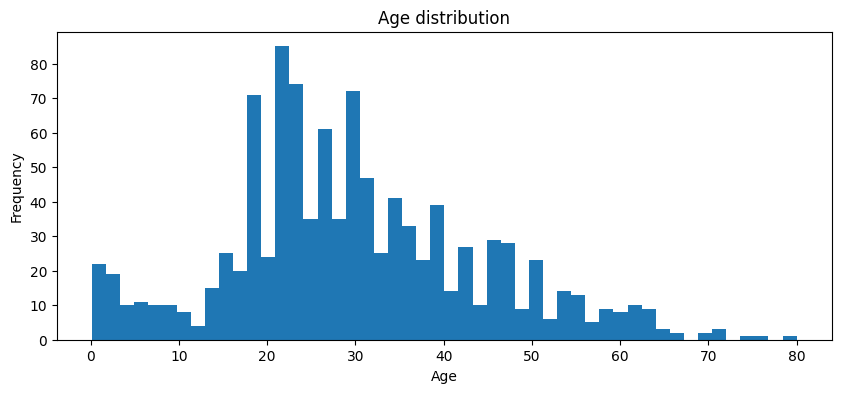

In [9]:
plot_hist("Age", all_data)

Regarding the fares (Fare), unsurprisingly, the lower values are more numerous.


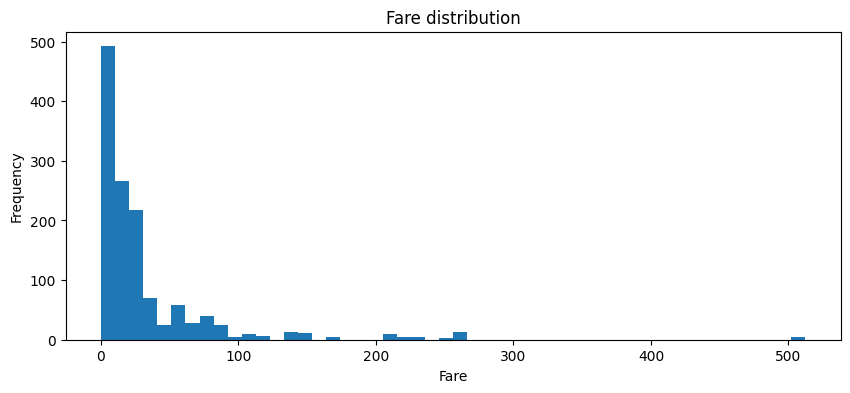

In [10]:
plot_hist("Fare", all_data)

# 2.2.2 Visualization and Analysis of Data Using a "Swarm" Plot <a class="anchor"  id="2.2.2"></a>

We will generate "swarm" plot graphs from the training data provided by Kaggle using the code below. These plots involve creating a scatter plot for each category with points adjusted to avoid overlap, providing a better representation of the distribution of values. We will use the "seaborn" library built on top of "matplotlib". If you want to learn more about this type of plot and how to implement it, I encourage you to consult the documentation.

> https://seaborn.pydata.org/generated/seaborn.swarmplot.html

In our case, we will place the "Sex" category on the x-axis, with "Age" on the y-axis, and each point will be colored according to survival, specifically 'Survived'. We will extend this organization by distributing it over three columns representing each class.

This graph allows us to grasp a lot of information at a glance, and we will draw some initial insights from it. We will refer back to it later as well.

At first glance, it's evident that the survival rate for women is much higher, especially in the first and second classes, where the vast majority of women survive. However, in the third class, things are more mixed.

For men, it's a disaster, with still a better chance of survival in the first class. However, men in the second and third classes are literally decimated.

Regarding the number of men and women, we observe that men are much more numerous. This imbalance is primarily due to the presence of a large number of men in the prime of life in the third class, perhaps in search of a better future. The destination being New York, and this city attracting many migrants, the idea of the "American dream" is prevalent at this time. In the first and second classes, things are a bit more balanced.

Regarding children, taking into account that there are missing values (since we have the age of only 714 passengers out of 891), there seems to be relatively few children. Could some children be "hidden" among the 177 missing values?

Children seem to have a better survival rate. We can even observe that boys under 12 years old have survived much better than older men. Boys in the first and second classes seem to have all survived according to the data we have. These observations confirm the "women and children first" hypothesis, although once again, the chances of survival are more mixed in the third class.

Indeed, there are likely more insights to gain from these graphs.



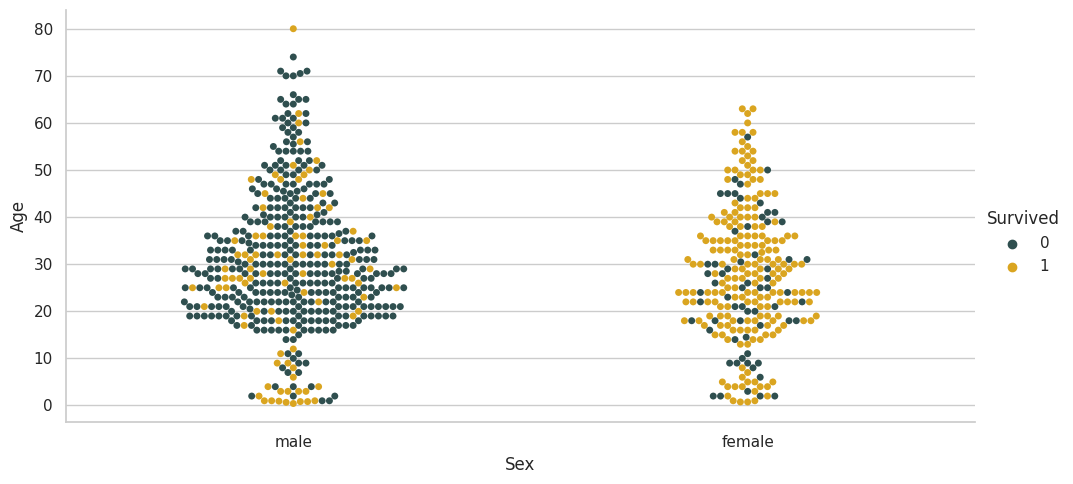

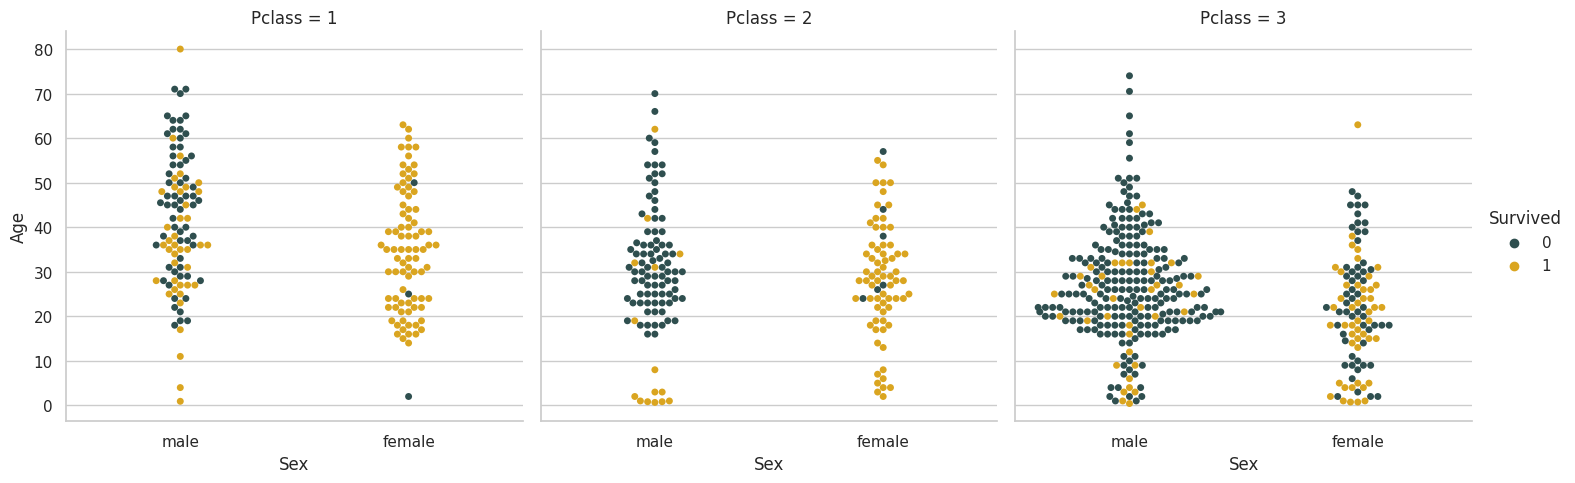

In [11]:
sns.set_theme(style="whitegrid")
palette = ['darkslategray', 'goldenrod']
sns.catplot(data=train,x="Sex",y="Age",hue="Survived",height=5, aspect=2, kind="swarm", palette=palette)
sns.catplot(data=train, col="Pclass",x = "Sex" ,y="Age",hue="Survived",height=5, aspect=1, kind="swarm", palette=palette)

# 2.2.3 Visualization and Analysis of Boarding Data <a class="anchor"  id="2.2.3"></a>

At first glance at the graph showing the relationship between the city of embarkation and the probability of survival, we might think there is a useful correlation. However, using the "strip plot" graph highlighting embarkations and class, we can explain this by the fact that third-class passengers are much fewer in number. Therefore, it's the survival probability based on class that is significant rather than the city of embarkation.

Here, we will use a bar chart :

> A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically.

> source : https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

And a 'strip plot' graph :

> It is basically a scatter plot that differentiates different categories. So, all the data that corresponds to each category is shown as a scatter plot, and all the observations and collected data that are visualized are shown, side-by-side on a single graph.

> source : https://www.educative.io/answers/what-is-seabornstripplot



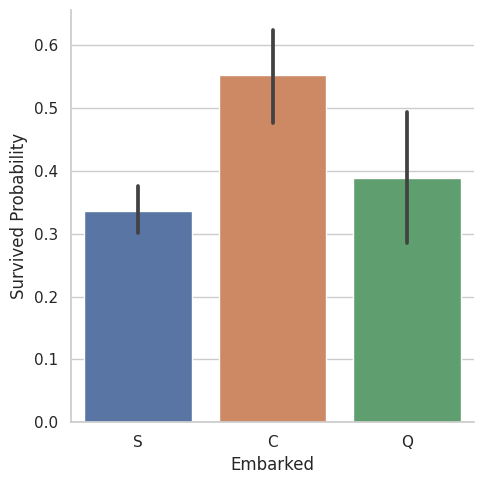

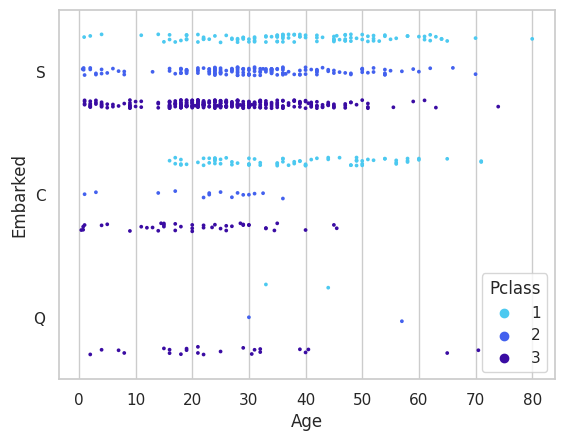

In [12]:
def cat_plot(feature_x, feature_y, data, label, kind = "bar"):
    g = sns.catplot(x = feature_x, y = feature_y, data = data, kind = kind)
    g.set_ylabels(label)
    plt.show()
    return g

cat_plot("Embarked", "Survived", train, "Survived Probability")

palette_2 = ["#3A0CA3", "#4361EE", "#4CC9F0"]
sns.stripplot(data=train.dropna(subset = ['Embarked']), x="Age", y="Embarked", hue="Pclass", dodge="true", size=2.7, palette = list(reversed(palette_2)))
plt.show()

# 2.3 A Dash of Feature Engineering <a class="anchor"  id="2.3"></a>

Before delving further into data exploration, we will create new features from the existing ones that will be necessary for a better understanding of the context, making them more usable.

> Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

> source : https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10

We will just initiate this process at this early stage to facilitate data exploration, but we will revisit it later to prepare the data for machine learning model usage.

# 2.3.1 Family Size <a class="anchor"  id="2.3.1"></a>

Here, we will create the "family_size" feature since the two features:

* sibsp: the number of siblings, spouses aboard the Titanic.
* parch: the number of parents and children aboard the Titanic.

While they provide a better understanding of family composition, they do not immediately capture the total. Therefore, we will add these two features together to obtain the total size of an individual's family.



In [13]:
# craft new features "Family Size" 
all_data["FamilySize"] = 1 + all_data["SibSp"] + all_data["Parch"]
display(all_data.head(3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


# 2.3.2 Title and Last Name <a class="anchor"  id="2.3.2"></a>

Still, for a better understanding of the family, we will process the 'Name' feature to extract the last name. At the same time, we will extract the title, which can provide valuable information.



In [14]:
# craft 2 features 'Surname' and 'Title'
all_data['Surname'] = all_data['Name'].apply(lambda x: x.split(',')[0]) 
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0]) 
display(all_data.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen,Miss.



After some research to understand the meaning of these different titles, one thing seems very interesting: the significance of the title "Master," which was used at that time to designate boys too young to be called "Mister." This might help us identify boys whose age is not specified.

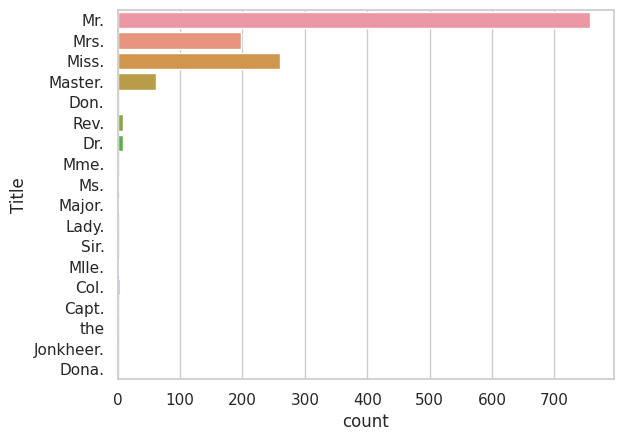

In [15]:
sns.countplot(y="Title", data = all_data, orient = 'v')
plt.show()

The script, while effective in the vast majority of cases in extracting the title from the name, made an error by assigning 'the' instead of 'Countess.' for passenger 760. We correct this error below.


In [16]:
display(all_data[all_data.Title=='the'])
#Correcting the Title for passenger 760
all_data.loc[(all_data.PassengerId==760), 'Title'] = 'Countess.'
display(all_data[all_data.PassengerId==760])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Title
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,1,Rothes,the


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Title
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,1,Rothes,Countess.


Indeed, several boys with the title "Master" did not have the age specified!


In [17]:
display(all_data.loc[(all_data.Title == 'Master.') & (all_data.Age.isnull())])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Title
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,3,Moubarek,Master.
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11,Sage,Master.
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,5,Lefebre,Master.
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,3,Moubarek,Master.
1135,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Johnston,Master.
1230,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,1,Betros,Master.
1235,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,3,van Billiard,Master.
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3,Peter,Master.


All boys under 12 have the title "Master," except passenger 732. Let's correct that quickly...


In [18]:
all_data.loc[(all_data.Age < 12) & (all_data.Sex == 'male') & (all_data.Title != 'Master.')]
#Correcting the Title for passenger 760
all_data.loc[(all_data.PassengerId==732), 'Title'] = 'Master.'
display(all_data[all_data.PassengerId==732])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Title
731,732,0.0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,1,Hassan,Master.


# 2.3.3 Identifying and grouping women and children from the same family <a class="anchor"  id="2.3.3"></a>

Here, we will create new features that seem essential to capture the reality by grouping women and children from the same family.

We will define the 'WomenChild' feature as the membership in a group of women accompanied by children from the same family. Then, with the 'WomenChildNameSurvival' feature, we will assign a survival rate based on the training data for each of these families containing women and children.

In [19]:
# Craft a dictionnary of surname for the women & children group 
women_child = all_data.loc[(all_data.Sex == 'female') | (all_data.Title == 'Master.')]
women_child_surname_dic = women_child.groupby('Surname')['PassengerId'].count().to_dict()

# craft a new feature 'WomenChildNameFreq' by mapping Surname to the dictionary
all_data.loc[(all_data.Sex == 'female') | (all_data.Title == 'Master.'), 'WomenChildNameFreq'] = all_data.Surname.map(women_child_surname_dic) 

# Craft a feature 'woman_child' for grouping woman and child... 1 for true if a passenger belong to this group 
all_data.loc[(all_data.WomenChildNameFreq>1), 'WomenChild'] = 1

# with the train data only, craft a dictionnary with an indice of survival
only_train = all_data[0:891]
women_child_survivor_dic = only_train[(only_train.WomenChild==1)].groupby('Surname')['Survived'].mean().to_dict()

# craft a new feature 'women_child_surname_survival'
all_data.loc[(all_data.WomenChild==1), 'WomenChildNameSurvival']=all_data.Surname.map(women_child_survivor_dic)

An important point to note here is that if we observe the survival rate of women and children groups based on the last name, according to the training data, 66 families from the 'women and children' group survived entirely, 22 families perished entirely, and only 4 families had a mixed outcome.

This leads us to believe that it is indeed wise to group women and children by family, and these families tend to either all survive or all perish together.

In [20]:
dic_value = list(women_child_survivor_dic.values())
print(dic_value.count(0))
print(dic_value.count(1))
print(sum(1 for i in dic_value if 0 < i < 1 ))

22
66
4


And this phenomenon is especially noticeable for the third class, as we can see in the following graph.

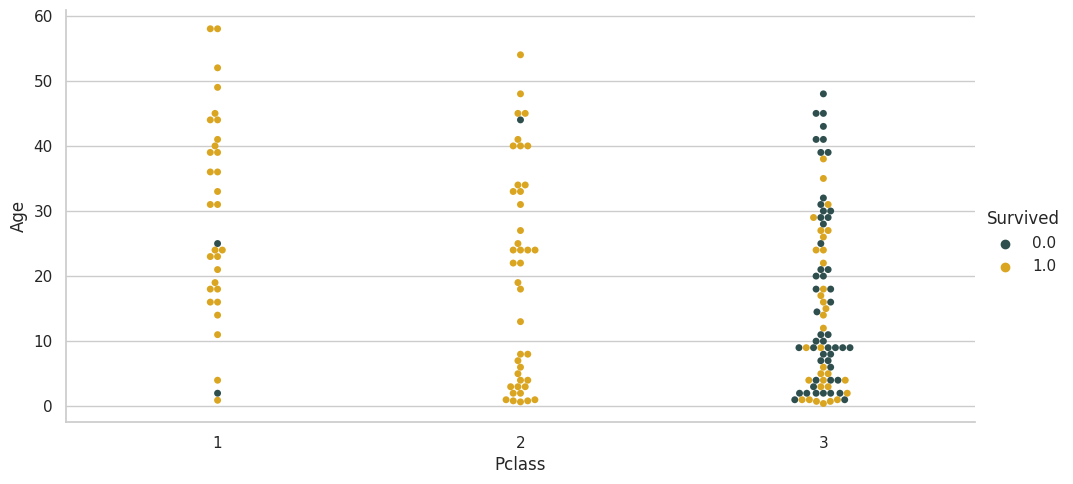

In [21]:
sns.catplot(data=only_train[only_train.WomenChild == 1], x="Pclass",y="Age",hue="Survived",height=5, aspect=2, kind="swarm", palette=palette)

Before continuing, since we made these changes to all_data, the original train and test data do not have the new features. To preserve the original data if needed, we will create new dataframes, only_train and only_test, containing the new features.

In [22]:
only_train = all_data[0:891]
only_test = all_data[891:1309]

# 2.4 Back to exploration... <a class="anchor"  id="2.4"></a>

We observe that family size seems to correlate with better survival, although for families with more than 4 members, the margin of error is too large to draw conclusions. As a hypothesis, following the "women and children first" principle, we can suggest that men traveling alone contribute to the drop in the survival rate of passengers traveling alone.

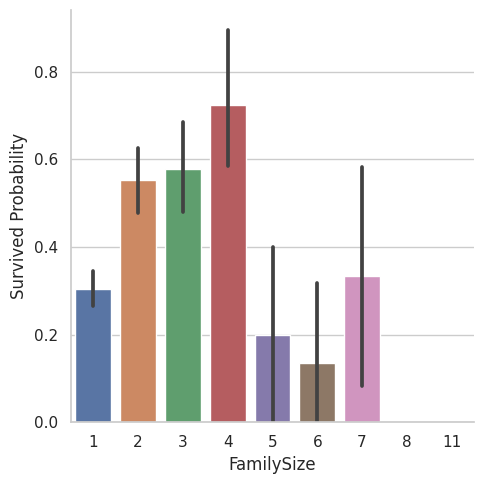

In [23]:
cat_plot("FamilySize", "Survived", only_train, "Survived Probability")

Through this 'swarmplot' chart below, correlating survival, age, and family size for each passenger, we also observe that children from larger families in the third class appear to have a significantly lower survival rate. (However, as mentioned earlier, the data for large families is limited, resulting in a significant margin of error.)

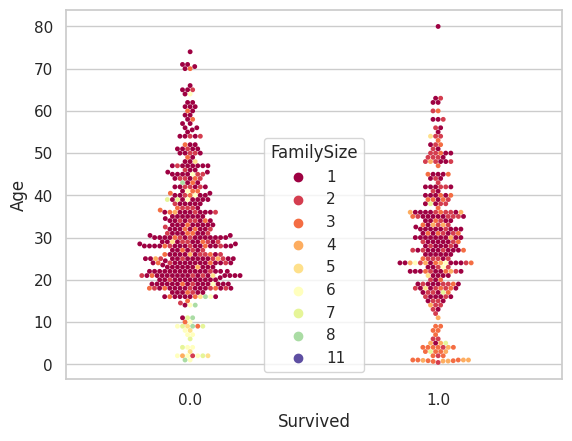

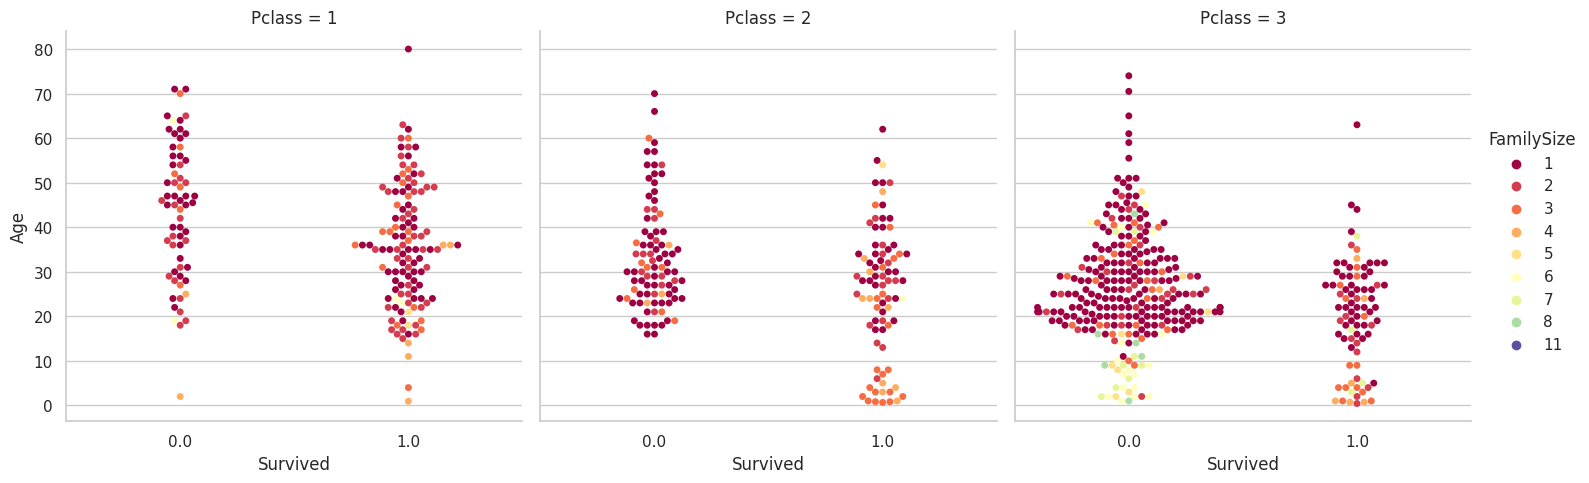

In [24]:
sns.swarmplot(data=only_train, x="Survived", y="Age", hue="FamilySize", size=3.5, legend='full', palette='Spectral')
sns.catplot(data=only_train, kind="swarm", x="Survived", y="Age", hue="FamilySize", legend='full', col="Pclass", palette='Spectral')

# 3. Data modeling <a class="anchor"  id="3"></a>

In the files provided by Kaggle, aside from the training and test data, there is a 'gender_submission' file that represents the predictions of a very simple model: all women survive, all men die.

By providing this file, Kaggle is clearly inviting us to try this model. That's what we'll do in the next cell.

Note that this model does not use machine learning but a very simple and rudimentary decision tree: "if it's a woman, then survive; if it's a man, then not."

> A decision tree is a decision support hierarchical model that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

> source : https://en.wikipedia.org/wiki/Decision_tree

In [25]:
# Have a look on gender_submission and output for submission
display(gender_submission.head(3))

# and save the output formated for submission
gender_submission.to_csv('gender_submission.csv', index=False)

# And submit ... 
# score for gender_submission = 0.76555

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


Despite its simplicity, this model manages to capture a significant part of reality with a score of 0.76555! So, we will continue to model manually, i.e., without machine learning, to see if we can beat this score, which will serve as a reference to assess the relevance of our subsequent models.

We will check our basic assumption, "women and children first," by building another model that predicts only women and children survive, and no men.

As we saw during the data exploration, there are many missing ages. While this is not a problem for girls, who will be included in the model among the surviving women, it's a different story for boys. Relying solely on gender and age, we will likely miss some boys.


Fortunately, during the data exploration, we determined that the title "Master" allows us to identify boys with certainty. We will use this feature. Also, it seems that children in the third class have less chance of survival if their family is large.

# 3.1 Decision tree "women and children first." <a class="anchor"  id="3.1"></a>

Let's see if we can improve this score by testing our basic hypothesis, 'women and children first,' adjusted by the observation that children from large families in the third class seem to have much lower chances of survival.

Here is our decision tree: "if it's a man, then no-survival; if it's a woman, then survival; if it's a boy from the first and second class, then survival; if it's a boy from the third class and a small family, then survival."

In [26]:
test_women_child = only_test
test_women_child = test_women_child.drop('Survived', axis=1) 

In [27]:
# Gender Model
test_women_child.loc[(test_women_child.Sex == 'female' ), 'Survived'] = 1
test_women_child.loc[(test_women_child.Sex == 'male'), 'Survived'] = 0

# Children 
test_women_child.loc[(test_women_child.Title == 'Master.') & (test_women_child.Pclass == 1), 'Survived'] = 1
test_women_child.loc[(test_women_child.Title == 'Master.') & (test_women_child.Pclass == 2), 'Survived'] = 1

test_women_child.loc[(test_women_child.Title == 'Master.') & (test_women_child.Pclass == 3) & (test_women_child.FamilySize < 3) , 'Survived'] = 1

test_women_child['Survived'] = test_women_child['Survived'].astype(int)

In [28]:
submission = test_women_child[['PassengerId', 'Survived']]
submission.to_csv('women_child_model.csv', index=False)
#Score : 0.77751 !!!! 

Score : 0.77751

We have already significantly improved the score. However, we have not yet used some of our observations, such as the possibility of grouping women and children by family, and that these families tend to survive or not survive together, etc.

Even though it is still possible to create a decision tree manually, things are starting to get more complex. It seems that now is the time to turn to 'machine learning.'

# 4. Machine Learning <a class="anchor"  id="4"></a>

Although this concept is probably already familiar to you, here is a definition of Machine Learning :

> The use and development of computer systems capable of learning and adapting without following explicit instructions, using algorithms and statistical models to analyze and draw conclusions from patterns in data.

> source : https://www.oed.com/?tl=true

# 4.1 Feature engineering and data preprocessing. <a class="anchor"  id="4.1"></a>

"We have already encountered the concept of feature engineering in this notebook.

Data preprocessing refers to the preliminary processing steps performed on the data before using it in an analysis or model. Preprocessing may include activities such as data cleaning, normalization, dimensionality reduction, etc."

# 4.1.1 creation of the 'isMaster' feature. <a class="anchor"  id="4.1.1"></a>

Here we are going to create the 'isMaster' feature, as, as we have seen, the title 'Master' is much more reliable for identifying boys than gender and age, due to many missing values concerning age.

In [29]:
all_data.loc[(all_data.Title == 'Master.'), 'isMaster'] = 1

# 4.1.2 Data preprocessing. <a class="anchor"  id="4.1.2"></a>

We will first set aside the features that we will not use for this instance: 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Surname', 'Title', 'Embarked'."We will first set aside the features that we will not use for this instance: 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Surname', 'Title', 'Embarked'."

* 'PassengerId': This unique identifier is not useful for the model's learning.

* 'Name': The unique name of each passenger neither.

* 'Ticket': We set it aside for now because, at the outset, we consider the class to be a more significant feature.

* Cabin': Many missing values; here too, we currently consider this feature as redundant since, indeed, only passengers in the first and second class have a cabin, indicating a higher socio-economic status, which is already captured by the 'Pclass' feature.

* 'Surname': This feature allowed us to group women and children from the same family, but for now, it is not useful.

* 'Title': This feature allowed us to identify boys reliably with the title 'Master', and we have created the 'isMaster' feature for that purpose, which we will use.

* 'Embarked': We observed that the embarkation city alone is not really useful for determining a chance of survival, but rather the proportion of each class at embarkation matters."

In [30]:
dropped_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Surname', 'Title', 'Embarked']

all_data_machine = all_data.drop(dropped_features, axis = 1)

display(all_data_machine.head(3))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,WomenChildNameFreq,WomenChild,WomenChildNameSurvival,isMaster
0,0.0,3,male,22.0,1,0,7.2500,2,NaN,NaN,NaN,NaN
1,1.0,1,female,38.0,1,0,71.2833,2,1.0,NaN,NaN,NaN
2,1.0,3,female,26.0,0,0,7.9250,1,1.0,NaN,NaN,NaN


Only the 'Sex' feature is a categorical variable. We will now encode it with OneHotEncoder

> One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning. Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.

> source : https://datagy.io/sklearn-one-hot-encode/

In [31]:
# Get list of categorical variables
s = (all_data_machine.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex']


In [32]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_all_data = pd.DataFrame(OH_encoder.fit_transform(all_data_machine[object_cols]))

# One-hot encoding removed index; put it back
OH_all_data.index = all_data_machine.index

# Remove categorical columns (will replace with one-hot encoding)
num_all_data = all_data_machine.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_all_data = pd.concat([num_all_data, OH_all_data], axis=1)

# Ensure all columns have string type
OH_all_data.columns = OH_all_data.columns.astype(str)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
display(OH_all_data.head(3))

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,WomenChildNameFreq,WomenChild,WomenChildNameSurvival,isMaster,0,1
0,0.0,3,22.0,1,0,7.2500,2,NaN,NaN,NaN,NaN,0.0,1.0
1,1.0,1,38.0,1,0,71.2833,2,1.0,NaN,NaN,NaN,1.0,0.0
2,1.0,3,26.0,0,0,7.9250,1,1.0,NaN,NaN,NaN,1.0,0.0


# 4.2 XGBoost and GridSearchCV <a class="anchor"  id="4.2"></a>

Here we will use XGBoost.

> XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

> source : https://www.nvidia.com/en-us/glossary/data-science/xgboost/

What is 'gradient boosting'?

> Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, i.e., models that make very few assumptions about the data, which are typically simple decision trees.

> source : https://en.wikipedia.org/wiki/Gradient_boosting

We will therefore use this algorithm using the 'GridSearchCV' technique.

> GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

> source : https://www.mygreatlearning.com/blog/gridsearchcv/

Finally, we will take advantage of a very interesting feature of XGBoost.

> XGBoost supports missing values by default. In tree algorithms, branch directions for missing values are learned during training.

> source : https://xgboost.readthedocs.io/en/stable/faq.html


# 4.2.1 Definition of the hyperparameters to test <a class="anchor"  id="4.2.1"></a>

In [34]:
params = {
 'learning_rate': [0.01, 0.05, 0.07, 0.1],
 'subsample': [1],
 'colsample_bylevel': [1],
 'colsample_bynode': [1],
 'colsample_bytree': [0.5],
 'gamma': [0, 1, 2],
 'max_delta_step': [0],
 'max_depth': [2, 3, 4, 5],
 'min_child_weight': [1.6],
 'n_estimators': [70, 80, 90, 100], 
 'random_state': [42],
 'scale_pos_weight': [1],
 'seed': [42],
 'n_jobs': [-1],
 'reg_lambda': [1, 2, 4, 16]
}

# 4.2.2 Definition of the xgb_classifier function <a class="anchor"  id="4.2.2"></a>

Although for this specific public notebook, we will not perform multiple tests, it is however considered good practice to gather all instructions within a function so that this function can be reused at will during various experiments.

In [35]:
def xgb_classifier(data, target, params):
      
    # Create X and y
    X = data.drop(target, axis=1)
    y = data[target]
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    # Create a XGBoost classifier (scikit-learn API wrapper)
    xgb_clf = XGBClassifier()
    
    # Perform a gridsearch with sklearn
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    gridsearch = GridSearchCV(xgb_clf, param_grid=params, scoring="accuracy", cv=kf, return_train_score=True)
    gridsearch.fit(X_scaled, y)
    
    # Return the gridsearch results plus the scaler
    return gridsearch, scaler

# 4.2.3 Feature Selection <a class="anchor"  id="4.2.3"></a>

We will discard some features:

* 'Age': too many missing values, we exclude it for this experiment...
* 'SibSp' and 'Parch': redundant with FamilySize
* 'Fare': we exclude it for this experiment as we consider that the class is sufficient
* 'WomenChildNameFreq': this feature would have been useful for grouping women and children from the same family, but it does not seem useful for this experiment.

In [36]:
dropped_features = ['Age', 'SibSp', 'Parch', 'Fare', 'WomenChildNameFreq']

data_for_XG = OH_all_data.drop(dropped_features, axis = 1)
display(data_for_XG.head(3)) 

,Survived,Pclass,FamilySize,WomenChild,WomenChildNameSurvival,isMaster,0,1
0,0.0,3,2,NaN,NaN,NaN,0.0,1.0
1,1.0,1,2,NaN,NaN,NaN,1.0,0.0
2,1.0,3,1,NaN,NaN,NaN,1.0,0.0


# 4.2.4 training <a class="anchor"  id="4.2.4"></a>

In [37]:

train_XG = data_for_XG[0:891]

test_XG = data_for_XG[891:1309]
test_XG = test_XG.drop('Survived', axis = 1)

gridsearch, scaler = xgb_classifier(train_XG, "Survived", params)

display(gridsearch.best_params_)


{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1.6,
 'n_estimators': 80,
 'n_jobs': -1,
 'random_state': 42,
 'reg_lambda': 4,
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 1}

# 4.2.5 Submitting our predictions to Kaggle and scoring <a class="anchor"  id="4.2.5"></a>

In [38]:

test_XG_scaled = scaler.transform(test_XG)

predictions = gridsearch.predict(test_XG_scaled)

output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
output.to_csv('gridsearch_xgboost.csv', index=False)
print("Your submission was successfully saved!") 

### Score : 0.80382

Your submission was successfully saved!


# 5. Recap and How to Go Further... <a class="anchor"  id="5"></a>

# 5.1 How good is your score  <a class="anchor"  id="5.1"></a>

It is well known that cheating is very prevalent in this friendly competition, for the simple reason that the complete data regarding the Titanic is public, and we already know the fate of each passenger. The only way to learn something from this challenge is to play the game honestly. As Carl McBride Ellis emphasizes in this notebook : 

> https://www.kaggle.com/code/carlmcbrideellis/titanic-leaderboard-a-score-0-8-is-great

So the only way to get a good way to evaluate your own score is to compare it with public notebooks that explain the entire method used to obtain a score in a transparent manner.

However, be careful, the scoring system on the Titanic friendly competition has evolved over time, which changes the score of a notebook depending on whether it was submitted before or after this update, as explained here:

> The first update (which many of you may already be aware of) is that the leaderboard scores are not permanent, and the scores will be removed after 2 months. The second update is that the calculation of the final score - which was previously performed on a percentage of the test data - has now changed. Scores are calculated on the entire test data. Now, ideally, this should not have changed the scoring model or changed it very little, on the order of a fraction of a percentage. But did you know that the scoring model is now such that you get a score between 1 and 3% LOWER than what could have been achieved previously!

and to continue :

> Scores of 79% and above are GOOD: Previously, 80% was considered very good. According to the new scoring model, this is equivalent to a score of about 79% and above. So, anything above that is a GOOD performance. Don't be disappointed if you don't reach 80%, which, according to the previous scoring model, was a benchmark score.

> https://www.kaggle.com/competitions/titanic/discussion/177265

# 5.2  How to go further? <a class="anchor"  id="5.2"></a>

I recommend first reading this notebook where OSCAR TAKESHITA has done an excellent job of inventorying all possible approaches as well as raising questions about paths to explore

> https://www.kaggle.com/code/pliptor/how-am-i-doing-with-my-score

Then you will find here the notebooks with well-documented methods and providing the best scores, both in Python and R. I want to thank especially the authors for generously sharing their knowledge and expertise.

(beware that the scores indicated are those before the update of the scoring system explained above)

* Divide and Conquer 
> https://www.kaggle.com/code/pliptor/divide-and-conquer-0-82296/report
    * Score : 0.82296
* Lasso Ridge by Bisaria
> https://www.kaggle.com/code/bisaria/titanic-lasso-ridge-implementation/report
    * Score : 0.82296
* Titanic using Name only Chris Deotte achieves this great score using nothing but the Name feature! (Note from his kernel: 0.81818 with Name only and 0.82296 by adding Ticket).
> https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818/notebook
    * Score : 0.82296
* Titanic Deep Net by Chris Deotte
> https://www.kaggle.com/code/cdeotte/titanic-deep-net-0-82296/notebook
    * Score : 0.82296
* Konstantin brings attention to feature scaling, which is essential when working with the kNN algorithm.
> https://www.kaggle.com/code/konstantinmasich/titanic-0-82-0-83/notebook
    * Score : 0.83253
* Titanic Mega Model Chris Deotte ensembles Kaggle’s top 6 models. It starts with a neat ensembling diagram.
> https://www.kaggle.com/code/cdeotte/titantic-mega-model-0-84210/notebook
    * Score : 0.84210
* Titanic WCG+XGBoost Chris Deotte Is this the ultimate Titanic model?
> https://www.kaggle.com/code/cdeotte/titanic-wcg-xgboost-0-84688/notebook
    * Score : 0.84688  



**I would like to thank the readers of this notebook as well as all the members of the Kaggle community. Thank you all!**